 크롤링이란?
• BeautifulSoup
‣ # 1) reqeusts 라이브러리를 활용한 HTML 페이지 요청 \
- # 1-1) res 객체에 HTML 데이터가 저장되고, res.content로 데이터를 추출할 수 있음 \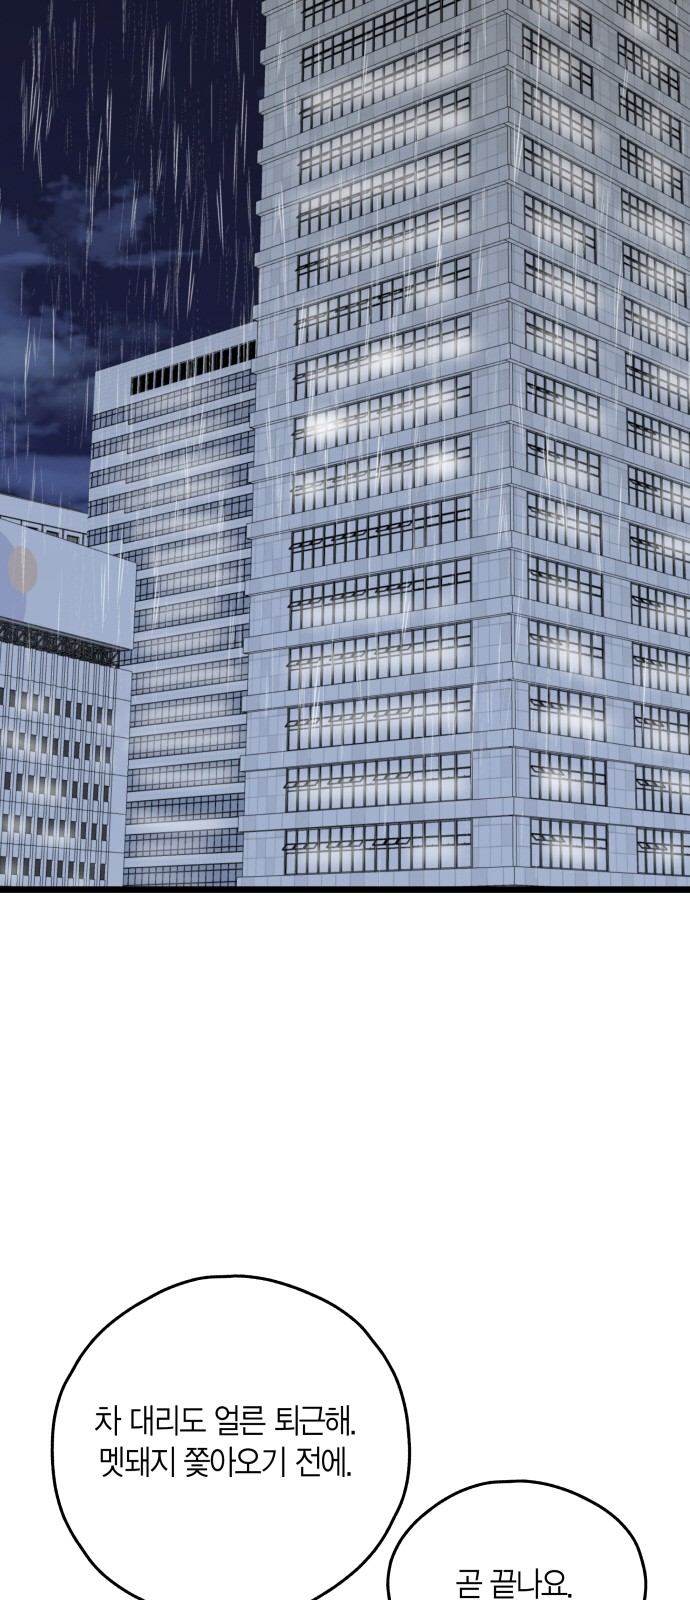
- res = requests.get('http://v.media.daum.net/v/20170615203441266')
- print(res.content)
‣ # 2) HTML 페이지 파싱 BeautifulSoup(HTML데이터, 파싱방법)
- # 2-1) BeautifulSoup 파싱방법
- soup = BeautifulSoup(res.content, ‘html.parser')
‣ # 3) 필요한 데이터 검색
- title = soup.find(‘title')
‣ # 4) 필요한 데이터 추출
- print(title.get_text())

In [1]:
!pip install requests

In [2]:
!pip install BeautifulSoup4

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 로또 번호 크롤링

In [4]:
import requests
from bs4 import BeautifulSoup as bs
res = requests.get('https://dhlottery.co.kr/common.do?method=main')
soup = bs(res.content, 'html.parser')
result = soup.select('.ball_645')
data = []
for num in result:
 data.append(int(num.text))
data


[6, 7, 13, 28, 36, 42, 41]

In [5]:
import pandas as pd
df = pd.Series(data)
df

0     6
1     7
2    13
3    28
4    36
5    42
6    41
dtype: int64

In [6]:
df.dtypes

dtype('int64')

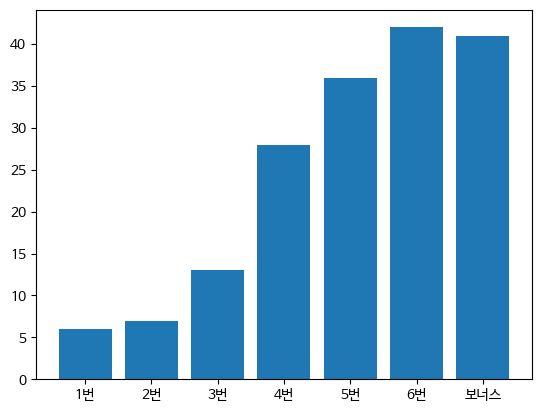

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.bar(['1번'
,'2번'
,'3번'
,'4번'
,'5번'
,'6번'
,
'보너스'], data)
plt.show()

# 뉴스 크롤링

In [8]:
!pip install newspaper3k

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13538 sha256=fbbb50d233f7a99fe0fd98f00c3d65e221dabcdc6241a106b4f155d279963f25
  Stored in directory: /root/.cache/pip/wheels/c8/d6/6c/384f58df48c00b9a31d638005143b5b3ac62c3d25fb1447f23
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3340 sha256=ced348e0f0d9018c6f78f62995fdc84bb42f6a8ee0f9e1db8317dec4a68ede5e
  Stored in directory: /root/.cache/pip/wheels/97/02/e7/a1ff1760e12bdbaab0ac824fae5c1bc

In [10]:
import newspaper as news
link = 'https://n.news.naver.com/mnews/hotissue/article/031/0000754250?type=series&cid=1087780'
article = news.Article(link, language='ko')
article.download()
article.parse()
print(article.text)

모두에게 보여주고 싶은 기사라면?beta 이 기사를 추천합니다 버튼을 눌러주세요.

집계 기간 동안 추천을 많이 받은 기사는 네이버 자동 기사배열 영역에 추천 요소로 활용됩니다. 레이어 닫기


In [11]:
import requests
from bs4 import BeautifulSoup as bs
url = 'https://n.news.naver.com/mnews/hotissue/article/031/0000754250?type=series&cid=1087780'
res = requests.get(url, headers={'User-Agent':'Mozilla/5.0'})
res.content


b'<!doctype html>\n<html lang="ko" data-useragent="Mozilla/5.0">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n\t\t<meta property="og:title" content="\xeb\x84\xb7\xed\x94\x8c\xeb\xa6\xad\xec\x8a\xa4, \xea\xb5\xad\xeb\x82\xb4\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb3\x84\xec\xa0\x95\xea\xb3\xb5\xec\x9c\xa0 \xea\xb8\x88\xec\xa7\x80 \xea\xb3\x84\xed\x9a\x8d\xe2\x80\xa6\xec\xa0\x81\xec\x9a\xa9 \xec\x8b\x9c\xec\xa0\x90\xec\x9d\x80 \'\xeb\xb6\x88\xed\x88\xac\xeb\xaa\x85\' [OTT\xec\x98\xa8\xec\x97\x90\xec\x96\xb4]">\n\t\t<meta property="og:type" content="article">\n\t\t<meta property="og:url" content="https://n.news.naver.com/mnews/hotissue/article/031/0000754250?cid&#x3D;1087780">\n\t\t<meta property="og:image" content="https://imgnews.pstatic.net/image/031/2023/06/25/0000754250_001_20230625080101079.jpg?t

In [13]:
import os
import requests
from bs4 import BeautifulSoup
url = "https://comic.naver.com/webtoon/detail.nhn?titleId=747961&no=2"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
if not(os.path.isdir("./webtoon")):
 os.makedirs(os.path.join('./webtoon'))
i = 1
for tag in soup.select('.wt_viewer img'):
 img_url = tag['src']
 save_img = "./webtoon/" + str(i).zfill(3) + img_url[-4:]
 i += 1
 print(save_img + " : OK")
 headers = {'Referer': img_url}
 img_data = requests.get(img_url, headers=headers).content

 with open(save_img, 'wb') as f:
  f.write(img_data)

./webtoon/001.jpg : OK
./webtoon/002.jpg : OK
./webtoon/003.jpg : OK
./webtoon/004.jpg : OK
./webtoon/005.jpg : OK
./webtoon/006.jpg : OK
./webtoon/007.jpg : OK
./webtoon/008.jpg : OK
./webtoon/009.jpg : OK
./webtoon/010.jpg : OK
./webtoon/011.jpg : OK
./webtoon/012.jpg : OK
./webtoon/013.jpg : OK
./webtoon/014.jpg : OK
./webtoon/015.jpg : OK
./webtoon/016.jpg : OK
./webtoon/017.jpg : OK
./webtoon/018.jpg : OK
./webtoon/019.jpg : OK
./webtoon/020.jpg : OK
./webtoon/021.jpg : OK
./webtoon/022.jpg : OK
./webtoon/023.jpg : OK
./webtoon/024.jpg : OK
./webtoon/025.jpg : OK
./webtoon/026.jpg : OK
./webtoon/027.jpg : OK
./webtoon/028.jpg : OK
./webtoon/029.jpg : OK
./webtoon/030.jpg : OK
./webtoon/031.jpg : OK
./webtoon/032.jpg : OK
./webtoon/033.jpg : OK
./webtoon/034.jpg : OK
./webtoon/035.jpg : OK
./webtoon/036.jpg : OK
./webtoon/037.jpg : OK
./webtoon/038.jpg : OK
./webtoon/039.jpg : OK
./webtoon/040.jpg : OK
./webtoon/041.jpg : OK
./webtoon/042.jpg : OK
./webtoon/043.jpg : OK
./webtoon/0